In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib as mpl 
import matplotlib.pyplot as plt


In [2]:
dataframe = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/testing.csv', low_memory=False)

dataframe['E-value'].astype(float)


0         0.8400
1         8.8000
2         0.6700
3         0.7200
4         0.7700
5         6.1000
6         3.3000
7         0.9900
8         1.3000
9         2.1000
10        2.6000
11        4.6000
12        5.5000
13        8.0000
14        0.1800
15        4.2000
16        7.8000
17        6.6000
18        2.5000
19        6.2000
20        7.3000
21        7.7000
22        3.4000
23        5.0000
24        5.3000
25        0.7300
26        4.3000
27        5.5000
28        8.2000
29        9.1000
           ...  
469188    2.9000
469189    0.7000
469190    1.3000
469191    4.7000
469192    5.2000
469193    9.9000
469194    0.0240
469195    1.1000
469196    4.4000
469197    5.2000
469198    5.2000
469199    5.9000
469200    1.3000
469201    3.2000
469202    3.7000
469203    6.2000
469204    7.3000
469205    0.0330
469206    0.0510
469207    3.0000
469208    9.5000
469209    4.6000
469210    6.3000
469211    0.0079
469212    2.8000
469213    4.0000
469214    6.9000
469215    0.30

In [4]:
#data_smaller_than = dataframe.loc[dataframe['E-value'] < 0.00000000000000000000000001]


In [5]:
#count_occurences = data_smaller_than['#target_name'].value_counts().plot.bar()

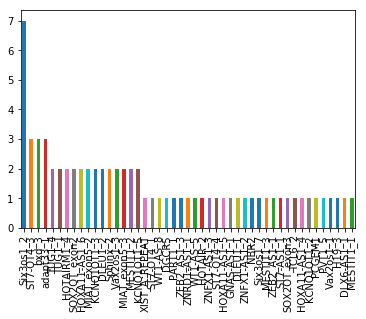

In [13]:
lncrna_list = []

with open('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/lncRNA.csv') as f:
    for line in f:
        lncrna_list.append(line.rstrip(' \n'))
        
df_lncrnas = dataframe[dataframe['accession'].isin(lncrna_list)]

df_lncrnas_smaller_than = df_lncrnas.loc[df_lncrnas['E-value'] < 0.001] # jaki jest significant wg Infernal? czy taki?

count_occurences = df_lncrnas_smaller_than['#target_name'].value_counts().plot.bar()

In [48]:
df_lncrnas_smaller_than['E-value'].astype(float)
df_lncrnas_smaller_than['score'].astype(float)
df_lncrnas_smaller_than['seq_from'].astype(int)
df_lncrnas_smaller_than['seq_to'].astype(int)

df_lncrnas_smaller_than_sorted = df_lncrnas_smaller_than.sort_values(by='E-value')
df_lncrnas_smaller_than_sorted.shape

(72, 20)

In [57]:
# select all sequences that were not significant after Infernal = all marked as '?'

unsignificant_by_infernal = dataframe[dataframe['inc'] == '?']
unsignificant_by_infernal['accession'].count()

450524

In [72]:
signifificant_in_dataframe = dataframe['accession'].count() - unsignificant_by_infernal['accession'].count() 
print('significant in dataframe: ' + str(signifificant_in_dataframe))


significant in dataframe: 18694


In [50]:
# make .csv from not significant hits after Infernal

unsignificant_by_infernal.to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_CPC/unsignificant_by_infernal.csv')

In [74]:
# make .csv with headers only - to obtain sequences 

get_headers = dataframe['query_name']
get_headers.to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_CPC/headers_not_significant_by_infernal.csv', index = False)

In [76]:
df_lncrnas_smaller_than_sorted.to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_CPC/lncrnas_identified_by_infernal_scan.csv', index=False)

In [90]:
# df['kolumna'] == 'cos' daje DOKLADNIE taka sama wartosc jak wymagana;
# .re match da tez 922 itp

# multifiltrowanie przez &: kazdy warunek w nawiasach, warunki polaczone przez &

mir92_in_dataframe = dataframe[(dataframe['#target_name'] == 'mir-92') & (dataframe['inc'] == '!')]  
mir92_in_dataframe_sorted = mir92_in_dataframe.sort_values(by='E-value')
mir92_in_dataframe_sorted.to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/mir92_filtered_from_Infernal_output/mi92.csv')




In [100]:
df_cpc_output = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_CPC/cpc_output.txt', sep='\t')

df_cpc_output.head()
#df_cpc_output.shape

,#ID,transcript_length,peptide_length,Fickett_score,pI,ORF_integrity,coding_probability,label
0,TRINITY_DN11462_c0_g1_i1,389,15,0.43821,3.665710,1,0.015544,noncoding
1,TRINITY_DN11462_c0_g1_i1,389,15,0.43821,3.665710,1,0.015544,noncoding
2,TRINITY_DN11475_c0_g1_i1,289,51,0.42905,12.000427,1,0.055786,noncoding
3,TRINITY_DN11475_c0_g1_i1,289,51,0.42905,12.000427,1,0.055786,noncoding
4,TRINITY_DN11475_c0_g1_i1,289,51,0.42905,12.000427,1,0.055786,noncoding


In [102]:
df_cpc_output_noncoding = df_cpc_output[df_cpc_output['label'] == 'noncoding']
df_cpc_output_noncoding.shape

df_cpc_output_noncoding['#ID'].to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_CPC/cpc_output_noncoding_filtered_headers.csv', index=False)

# output do viennarna jest tu. ponizej bawie sie w sortowanie, ale plik do vieny jest z tego

In [121]:
df_cpc_output_noncoding['coding_probability'].astype(float) # w tym wypadku nie trzeba tego, dziala bez ;)

df_cpc_output_noncoding_sorted = df_cpc_output_noncoding.sort_values(by='coding_probability')

df_cpc_output_noncoding_sorted.head(10)

#pewnie mozna odfiltrowac troche wiecej rzeczy niz tylko coding/noncoding, jakbyco

,#ID,transcript_length,peptide_length,Fickett_score,pI,ORF_integrity,coding_probability,label
333842,TRINITY_DN31496_c2_g6_i1,308,0,0.31230,0.0,-1,4.662020e-07,noncoding
333843,TRINITY_DN31496_c2_g6_i1,308,0,0.31230,0.0,-1,4.662020e-07,noncoding
333844,TRINITY_DN31496_c2_g6_i1,308,0,0.31230,0.0,-1,4.662020e-07,noncoding
333845,TRINITY_DN31496_c2_g6_i1,308,0,0.31230,0.0,-1,4.662020e-07,noncoding
333846,TRINITY_DN31496_c2_g6_i1,308,0,0.31230,0.0,-1,4.662020e-07,noncoding
287686,TRINITY_DN30145_c2_g2_i1,244,0,0.31220,0.0,-1,4.662050e-07,noncoding
117210,TRINITY_DN16426_c0_g1_i1,228,0,0.31219,0.0,-1,4.662050e-07,noncoding
287689,TRINITY_DN30145_c2_g2_i1,244,0,0.31220,0.0,-1,4.662050e-07,noncoding
287688,TRINITY_DN30145_c2_g2_i1,244,0,0.31220,0.0,-1,4.662050e-07,noncoding
287687,TRINITY_DN30145_c2_g2_i1,244,0,0.31220,0.0,-1,4.662050e-07,noncoding


In [10]:
# lista significant po infernal do blastowania (stworzenie genomu 'referencyjnego')

df_significant = dataframe[dataframe['inc'] == '!']

df_significant.to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant.csv', index=False)

df_significant_headers = df_significant['query_name']
                                        
df_significant_headers.to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant_headers.csv', index=False)




In [18]:
# analizowanie licznosc po samtools idxstats


dataframe = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/PBS48_1/PBS48_significant_counted.txt', sep='\t')

dataframe.head()


,header,seq_length,mapped_reads,unmapped_reads
0,TRINITY_DN11415_c0_g1_i1,513,4,2
1,TRINITY_DN11486_c0_g1_i1,684,14,2
2,TRINITY_DN11418_c0_g1_i1,858,17,1
3,TRINITY_DN11499_c0_g1_i1,452,16,6
4,TRINITY_DN11480_c0_g1_i1,498,9,0


In [21]:
dataframe.dtypes

header            object
seq_length         int64
mapped_reads       int64
unmapped_reads     int64
dtype: object

In [27]:
dataframe_sorted = dataframe.sort_values(by='mapped_reads', ascending = False)
dataframe_sorted.head(50)

,header,seq_length,mapped_reads,unmapped_reads
1136,TRINITY_DN35151_c7_g1_i4,1225,842684,3256
7857,TRINITY_DN38957_c0_g2_i1,340,236600,101339
5862,TRINITY_DN33207_c5_g1_i1,420,180731,28929
8469,TRINITY_DN36956_c0_g1_i1,349,170084,118572
6904,TRINITY_DN27740_c0_g1_i1,556,150611,16577
8811,TRINITY_DN21808_c0_g1_i1,205,139453,93747
4045,TRINITY_DN36607_c0_g1_i1,1878,105603,2340
3056,TRINITY_DN28185_c9_g2_i1,357,89476,57807
3978,TRINITY_DN34655_c0_g1_i4,1796,84253,24633
5772,TRINITY_DN35852_c4_g1_i1,374,83827,18863


In [7]:
matryca_significant_RC = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant_counted/matryca_do_deseq_srnabench.mat', sep='\t')
matryca_significant_RC.set_index('name', inplace=True)
matryca_significant_RC.head(10)

,PBS48_1|control,PBS48_2|control,MIM48_5|MIM,MIM48_6|MIM
name,,,,
TRINITY_DN11415_c0_g1_i1,4,8,3,0
TRINITY_DN11486_c0_g1_i1,14,2,17,16
TRINITY_DN11418_c0_g1_i1,17,14,13,5
TRINITY_DN11499_c0_g1_i1,16,12,11,13
TRINITY_DN11480_c0_g1_i1,9,11,19,13
TRINITY_DN11457_c0_g1_i1,5,2,13,4
TRINITY_DN11456_c0_g1_i1,16,1,21,31
TRINITY_DN11482_c0_g1_i1,15,6,1,1
TRINITY_DN84597_c0_g1_i1,3,1,6,0


In [6]:
srna_deseq = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant_counted/matryca_do_deseq_srnabenchedgeR_table.csv', sep='\t')
srna_deseq.head(10)

,PBS48_1.control,PBS48_2.control,MIM48_5.MIM,MIM48_6.MIM,logFC,logCPM,PValue,FDR
TRINITY_DN14419_c0_g1_i1,7.984342e+01,1.665742e+02,2.357292e+01,2.509422e+01,-2.332092,3.759896,1.299527e-04,2.727471e-02
TRINITY_DN18862_c0_g1_i1,8.690918e+01,3.000734e+02,3.808071e+00,1.544574e-02,-6.538964,4.154481,2.498839e-12,3.023595e-08
TRINITY_DN22908_c0_g1_i1,1.387779e-17,1.387779e-17,0.000000e+00,1.063207e+03,12.061198,5.583267,1.148512e-05,5.602321e-03
TRINITY_DN22930_c0_g1_i1,9.589379e+01,1.118692e+02,1.509630e+01,1.255763e+01,-2.895877,3.444820,2.939776e-06,1.872173e-03
TRINITY_DN23038_c0_g1_i1,3.010473e+01,6.724666e+01,4.701705e+00,6.268920e+00,-3.120188,2.373702,2.751376e-04,4.709043e-02
TRINITY_DN25878_c0_g1_i1,2.211688e+02,1.838478e+02,3.580993e+01,5.957485e+01,-2.086071,4.508919,4.719278e-05,1.502717e-02
TRINITY_DN26167_c2_g1_i1,1.055944e+02,2.327804e+02,1.126318e+01,3.654716e+01,-2.819994,4.139508,3.059794e-05,1.161123e-02
TRINITY_DN26670_c3_g1_i1,9.757979e+01,2.784079e+02,8.428160e+00,3.549350e+01,-3.093812,4.257564,2.950461e-05,1.161123e-02
TRINITY_DN27000_c8_g1_i1,3.454548e+01,7.638007e+01,9.496746e-01,4.943882e-03,-6.490712,2.416122,4.832798e-08,5.847686e-05
TRINITY_DN27517_c1_g1_i1,6.982903e+00,3.292762e+01,1.387779e-17,1.387779e-17,-7.333848,1.078119,2.928002e-04,4.853263e-02


In [17]:
deseq_merged = pd.merge(matryca_significant_RC, srna_deseq, left_index=True, right_index=True)
                        
deseq_merged.head(10)

,PBS48_1|control,PBS48_2|control,MIM48_5|MIM,MIM48_6|MIM,PBS48_1.control,PBS48_2.control,MIM48_5.MIM,MIM48_6.MIM,logFC,logCPM,PValue,FDR
TRINITY_DN31335_c3_g1_i1,41,44,0,0,36.368930,50.195484,1.387779e-17,1.387779e-17,-8.445216,2.076612,2.784815e-08,0.000042
TRINITY_DN29764_c1_g1_i1,129,90,12,11,114.578198,102.778046,1.131337e+01,1.150430e+01,-3.238369,3.473802,3.097781e-07,0.000341
TRINITY_DN28419_c4_g2_i1,98,141,17,15,86.960292,160.884804,1.603149e+01,1.568800e+01,-2.953871,3.683997,2.481165e-06,0.001668
TRINITY_DN28450_c6_g1_i1,100,161,18,21,88.725519,183.699772,1.696031e+01,2.194913e+01,-2.799227,3.835232,7.067325e-06,0.003824
TRINITY_DN35129_c1_g1_i1,82,71,14,16,72.807312,81.052452,1.318905e+01,1.672289e+01,-2.354295,3.100869,2.686124e-04,0.047090
TRINITY_DN30644_c2_g1_i1,26,702,18,18,22.935348,801.104727,1.696828e+01,1.881934e+01,-4.515509,5.277405,6.691003e-05,0.020240
TRINITY_DN27968_c2_g4_i1,49,10,111,236,43.649735,11.567748,1.046479e+02,2.467084e+02,2.653986,4.213828,1.250007e-04,0.027275
TRINITY_DN34801_c0_g1_i1,5,2,16,212,4.465406,2.334998,1.501083e+01,2.215600e+02,5.061509,3.489959,1.157504e-05,0.005602
TRINITY_DN29851_c5_g1_i1,92,11,3,1,81.891759,12.741641,2.842676e+00,1.061348e+00,-4.507628,2.264753,1.257864e-04,0.027275
TRINITY_DN29885_c5_g1_i1,243,282,23,82,215.766663,321.891519,2.162818e+01,8.567507e+01,-2.324720,4.869152,2.085050e-04,0.038814


In [81]:
# dodanie nazw do headersow trinity

significant = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant.csv')



#significant.shape (18694, 20)
#significant.groupby('#target_name').count() 

significant.groupby(significant['#target_name'].str.contains('rRNA')).count()
significant.head(10)

,#target_name,accession,query_name,accession.1,mdl,mdl_from,mdl_to,seq_from,seq_to,strand,trunc,pass,gc,bias,score,E-value,inc,description_of_target,Unnamed: 18,Unnamed: 19
0,UnaL2,RF00436,TRINITY_DN11415_c0_g1_i1,-,cm,1,54,474,420,-,no,1,0.55,0.0,38.6,4.300000e-06,!,-,NaN,NaN
1,UnaL2,RF00436,TRINITY_DN11486_c0_g1_i1,-,cm,1,54,98,44,-,no,1,0.40,0.0,61.2,7.600000e-12,!,-,NaN,NaN
2,SNORA70,RF00156,TRINITY_DN11418_c0_g1_i1,-,cm,1,135,564,457,-,no,1,0.55,0.0,29.0,9.600000e-04,!,-,NaN,NaN
3,UnaL2,RF00436,TRINITY_DN11499_c0_g1_i1,-,cm,1,54,226,279,+,no,1,0.44,0.0,61.3,4.900000e-12,!,-,NaN,NaN
4,UnaL2,RF00436,TRINITY_DN11480_c0_g1_i1,-,cm,1,54,449,396,-,no,1,0.44,0.0,60.0,1.100000e-11,!,-,NaN,NaN
5,UnaL2,RF00436,TRINITY_DN11457_c0_g1_i1,-,cm,1,54,27,80,+,no,1,0.39,0.0,59.1,2.400000e-11,!,-,NaN,NaN
6,UnaL2,RF00436,TRINITY_DN11456_c0_g1_i1,-,cm,1,54,126,73,-,no,1,0.41,0.0,55.5,1.400000e-10,!,-,NaN,NaN
7,tRNA,RF00005,TRINITY_DN11456_c0_g1_i1,-,cm,1,71,214,142,-,no,1,0.58,0.0,31.1,5.100000e-05,!,-,NaN,NaN
8,Hsp83_3_UTR,RF02400,TRINITY_DN11482_c0_g1_i1,-,cm,220,364,209,81,-,no,1,0.53,0.0,25.6,9.900000e-06,!,-,NaN,NaN
9,MIR408,RF00690,TRINITY_DN11482_c0_g1_i1,-,cm,1,136,225,94,-,no,1,0.53,0.0,26.5,8.200000e-05,!,-,NaN,NaN


In [24]:
# dodanie nazw do headersow trinity

merged_with_headers_names = pd.merge(deseq_merged, significant, left_index=True, right_index=True)


merged_with_headers_names.head(10)

merged_with_headers_names.to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant_counted/merged_with_names.csv')

In [26]:
srna_deseq.shape

(73, 8)

In [8]:
# deseq

srna_deseq_selection = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant_counted/deseq_selection.csv')

srna_deseq_selection.head(10)

,query_name,PBS48_1.control,PBS48_2.control,MIM48_5.MIM,MIM48_6.MIM,foldChange,log2FoldChange,pval,padj
0,TRINITY_DN31335_c3_g1_i1,"35,7313385139713","49,940677564496",0,0,0,#DZIEL/0!,"0,000000110117376929011","0,000329928606522027"
1,TRINITY_DN29764_c1_g1_i1,"112,422991909812","102,151385927378","11,1863971505557","11,3161107919429","0,104870433130523","-3,25332010895079","0,00000156696798650557","0,00281644779476809"
2,TRINITY_DN28380_c3_g4_i1,"18,3014172876438","36,3204927741789",0,0,0,#DZIEL/0!,"0,0000210113812421699","0,0182831498635962"
3,TRINITY_DN22930_c0_g1_i1,"94,1215746221683","111,231509120923","14,9151962007409","12,344848136665","0,132747187626896","-2,91324679837552","0,000014921134960511","0,0170256553533099"
4,TRINITY_DN29902_c4_g2_i5,"253,605353843065","178,197417673315","892,115172756815","734,518464131565","3,76707548952514","1,91344494416195","0,0000262331660175703","0,0210442457792949"
5,TRINITY_DN32472_c0_g2_i11,"1661,94298893032","1350,66832503978","165,931557733243","176,942823292198","0,113813016447047","-3,13526253118198","0,00000000000995667525254465","0,00000011980867331387"
6,TRINITY_DN29291_c6_g1_i2,"295,43716478625","333,694527362769","1262,1984784877","877,512955047935","3,40105491463433","1,76598230049769","0,0000517944671478158","0,0328022538520878"
7,TRINITY_DN29249_c4_g5_i1,"13,943936981062","2,27003079838618","82,0335791040749","61,7242406833248","8,86629489726867","3,148331348038","0,0000661506201773427","0,0375939192439969"
8,TRINITY_DN73310_c0_g1_i1,0,0,"94,1521760171769","39,092019099439",#DZIEL/0!,#DZIEL/0!,"0,0000406183285589472","0,0287506086794007"
9,TRINITY_DN35290_c2_g2_i1,"80,1776376411063","29,5104003790204","215,338145148197","276,73034573024","4,48607249942921","2,16545293601086","0,0000598691738841983","0,0360202884674279"


In [56]:
merged = pd.merge(srna_deseq_selection, significant, on='query_name', how='inner')

merged.shape
merged.to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant_counted/deseq_merged_with_names.csv')

Przypisanie do plików wynikowych po srnatoolbox DE nazw dla headerow trinity
===

In [17]:
srna_deseq = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant_counted/PBS-IVF_vs_MIM/PBS-IVF_vs_mim_control_vs_MIM-deseq_selection.csv', sep=',')
srna_deseq.head(10)

,query_name,PBS48_1.control,PBS48_2.control,IVF48_3.control,IVF48_4.control,MIM48_5.MIM,MIM48_6.MIM,foldChange,log2FoldChange,pval,padj
0,TRINITY_DN30635_c2_g2_i1,0,"13,8364640596546","0,945500440936499","2,84329826389719","52,8072376736391","94,9565640629082","16,7672736243416","4,06757621918579","0,0000000303354595461001","0,000366816376831442"
1,TRINITY_DN30453_c5_g9_i1,"640,676237288797","142,976795283097","294,050637131251","319,397171644452","1204,19361623638","1006,95697055721","3,16534142898488","1,66236112408851","0,0000341881432471116","0,04794828313878"
2,TRINITY_DN31607_c0_g1_i4,"845,373624306379","279,035358536367","480,314223995742","656,801898960252","1795,44608090373","1597,56592945398","3,00064058688338","1,58527052500958","0,0000439062676387856","0,0482649625716541"
3,TRINITY_DN29902_c4_g2_i5,"257,865539489682","181,027071447147","216,519600974458","419,860376968819","902,437972387011","745,043810339741","3,06430536733499","1,6155600733686","0,000035687607364292","0,04794828313878"
4,TRINITY_DN29249_c4_g5_i1,"14,1781739925598","2,30607734327576","16,0735074959205","2,84329826389719","82,9828020585757","62,6087235579614","8,22526430344441","3,04006203789252","0,00000418834521787062","0,0126613675936229"
5,TRINITY_DN35290_c2_g2_i1,"81,524500457219","29,9790054625849","45,384021164952","38,858409606595","217,829855403761","280,69577728486","5,09359878539588","2,34868532531374","0,000000486261494938261","0,00293993699839672"
6,TRINITY_DN35280_c1_g5_i1,"635,359422041587","1320,22927902537","1153,51053794253","925,96746794252","184,825331857737","270,2609900252","0,225565699371894","-2,14838039376577","0,0000137095499654709","0,0296880750899333"
7,TRINITY_DN30148_c3_g1_i3,"54,9404242211693","31,1320441342228","78,4765365977295","58,7614974538754","211,228950694556","279,652298558894","4,39640092124991","2,13632295606077","0,00000367174264681832","0,0126613675936229"
8,TRINITY_DN27499_c6_g1_i1,0,0,0,0,"10,372850257322","19,8260957933545",#DZIEL/0!,#DZIEL/0!,"0,0000147310991183923","0,0296880750899333"
9,TRINITY_DN39510_c10_g4_i1,0,0,0,0,"15,0877821924683","11,4782659856263",#DZIEL/0!,#DZIEL/0!,"0,0000402302811997026","0,0482649625716541"


In [18]:
significant = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant.csv')
significant.head(10)

,#target_name,accession,query_name,accession.1,mdl,mdl_from,mdl_to,seq_from,seq_to,strand,trunc,pass,gc,bias,score,E-value,inc,description_of_target,Unnamed: 18,Unnamed: 19
0,UnaL2,RF00436,TRINITY_DN11415_c0_g1_i1,-,cm,1,54,474,420,-,no,1,0.55,0.0,38.6,4.300000e-06,!,-,NaN,NaN
1,UnaL2,RF00436,TRINITY_DN11486_c0_g1_i1,-,cm,1,54,98,44,-,no,1,0.40,0.0,61.2,7.600000e-12,!,-,NaN,NaN
2,SNORA70,RF00156,TRINITY_DN11418_c0_g1_i1,-,cm,1,135,564,457,-,no,1,0.55,0.0,29.0,9.600000e-04,!,-,NaN,NaN
3,UnaL2,RF00436,TRINITY_DN11499_c0_g1_i1,-,cm,1,54,226,279,+,no,1,0.44,0.0,61.3,4.900000e-12,!,-,NaN,NaN
4,UnaL2,RF00436,TRINITY_DN11480_c0_g1_i1,-,cm,1,54,449,396,-,no,1,0.44,0.0,60.0,1.100000e-11,!,-,NaN,NaN
5,UnaL2,RF00436,TRINITY_DN11457_c0_g1_i1,-,cm,1,54,27,80,+,no,1,0.39,0.0,59.1,2.400000e-11,!,-,NaN,NaN
6,UnaL2,RF00436,TRINITY_DN11456_c0_g1_i1,-,cm,1,54,126,73,-,no,1,0.41,0.0,55.5,1.400000e-10,!,-,NaN,NaN
7,tRNA,RF00005,TRINITY_DN11456_c0_g1_i1,-,cm,1,71,214,142,-,no,1,0.58,0.0,31.1,5.100000e-05,!,-,NaN,NaN
8,Hsp83_3_UTR,RF02400,TRINITY_DN11482_c0_g1_i1,-,cm,220,364,209,81,-,no,1,0.53,0.0,25.6,9.900000e-06,!,-,NaN,NaN
9,MIR408,RF00690,TRINITY_DN11482_c0_g1_i1,-,cm,1,136,225,94,-,no,1,0.53,0.0,26.5,8.200000e-05,!,-,NaN,NaN


In [19]:
PBS_IVF_vs_MIM_with_names = pd.merge(srna_deseq, significant, on='query_name', how='inner')
PBS_IVF_vs_MIM_with_names.columns

Index(['query_name', 'PBS48_1.control', 'PBS48_2.control', 'IVF48_3.control',
       'IVF48_4.control', 'MIM48_5.MIM', 'MIM48_6.MIM', 'foldChange',
       'log2FoldChange', 'pval', 'padj', '#target_name', 'accession',
       'accession.1', 'mdl', 'mdl_from', 'mdl_to', 'seq_from', 'seq_to',
       'strand', 'trunc', 'pass', 'gc', 'bias', 'score', 'E-value', 'inc',
       'description_of_target', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [22]:
PBS_IVF_vs_MIM_with_names = PBS_IVF_vs_MIM_with_names[['query_name', '#target_name', 'E-value', 'PBS48_1.control', 'PBS48_2.control', 'IVF48_3.control',
       'IVF48_4.control', 'MIM48_5.MIM', 'MIM48_6.MIM', 'foldChange',
       'log2FoldChange', 'accession', 'mdl', 'mdl_from', 'mdl_to', 'seq_from', 'seq_to',
       'strand', 'trunc']]

PBS_IVF_vs_MIM_with_names_sorted = PBS_IVF_vs_MIM_with_names.sort()

In [23]:
PBS_IVF_vs_MIM_with_names.to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/genome/grabFasta_from_unnanotated_headers/files_for_blast/significant_counted/PBS-IVF_vs_MIM/PBS-IVF_vs_MIM-merged-with-names')

In [3]:
srna_edgeR = pd.read_csv('/run/media/maciek/WinToUSB/RNAseq_kopie_do_zabawy/significant_counted/PBS-IVF_vs_MIM/PBS-IVF_vs_mim_control_vs_MIM-edgeR_selection.csv', sep=',')
srna_edgeR.head(10)

,query_name,PBS48_1.control,PBS48_2.control,IVF48_3.control,IVF48_4.control,MIM48_5.MIM,MIM48_6.MIM,logFC,logCPM,PValue,FDR
0,TRINITY_DN15475_c0_g2_i1,"1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17",0,"38,5605826493156","7,28490537333597","0,573736852115846","0,000153284410913","0,049311791668203"
1,TRINITY_DN19517_c1_g1_i1,"1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17",0,"45,0068742602135","7,50631465792331","0,747910507597359","7,29014439003645E-05","0,030417499006704"
2,TRINITY_DN19531_c0_g2_i1,"1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17",0,"106,268504431014","8,74033807963898","1,8087712796492","1,0441341580565E-06","0,001403780368054"
3,TRINITY_DN21751_c0_g1_i1,"132,959253919794","101,475047878564","495,348723629036","728,902102744305","56,9779252399162","30,1488076746078","-3,06114251378676","5,54404017259193","0,000119730864686","0,04261010184428"
4,TRINITY_DN22908_c0_g1_i1,"1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17",0,"1093,13362672532","12,0994275911826","5,04615982946097","4,25744672020642E-10","5,15151053144977E-06"
5,TRINITY_DN27397_c18_g1_i4,"85,5109829503489","31,2119395276841","52,6816268249042","65,1133584061063","219,149664258497","197,819653101676","1,82456321806691","4,31188598994099","3,47181741878735E-05","0,019094995803331"
6,TRINITY_DN27499_c6_g1_i1,"1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17","10,5998481811171","20,39075765575","6,96983096040389","0,350875617673939","3,24904472154231E-06","0,003024110856205"
7,TRINITY_DN27968_c2_g4_i1,"44,2693468938993","11,628486945963","26,8425443669446","1,91235641567188","107,131536426015","253,646224952498","3,08187607300087","3,77321370519905","1,63141029058971E-05","0,009870032258068"
8,TRINITY_DN28083_c3_g1_i1,"1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17","1,38777878078145E-17",0,"46,0813461637635","7,54012759330689","0,77502725990696","6,49450701034087E-05","0,02806554815183"
9,TRINITY_DN28380_c3_g4_i1,"18,8618958275394","36,611069451814","13,3862397050146","12,6137335996647","1,38777878078145E-17","1,38777878078145E-17","-7,35945021636532","1,48071901138879","1,56333010271725E-05","0,009870032258068"


In [2]:
significant = pd.read_csv('/run/media/maciek/WinToUSB/RNAseq_kopie_do_zabawy/significant.csv')
significant.head(10)

,#target_name,accession,query_name,accession.1,mdl,mdl_from,mdl_to,seq_from,seq_to,strand,trunc,pass,gc,bias,score,E-value,inc,description_of_target,Unnamed: 18,Unnamed: 19
0,UnaL2,RF00436,TRINITY_DN11415_c0_g1_i1,-,cm,1,54,474,420,-,no,1,0.55,0.0,38.6,4.300000e-06,!,-,NaN,NaN
1,UnaL2,RF00436,TRINITY_DN11486_c0_g1_i1,-,cm,1,54,98,44,-,no,1,0.40,0.0,61.2,7.600000e-12,!,-,NaN,NaN
2,SNORA70,RF00156,TRINITY_DN11418_c0_g1_i1,-,cm,1,135,564,457,-,no,1,0.55,0.0,29.0,9.600000e-04,!,-,NaN,NaN
3,UnaL2,RF00436,TRINITY_DN11499_c0_g1_i1,-,cm,1,54,226,279,+,no,1,0.44,0.0,61.3,4.900000e-12,!,-,NaN,NaN
4,UnaL2,RF00436,TRINITY_DN11480_c0_g1_i1,-,cm,1,54,449,396,-,no,1,0.44,0.0,60.0,1.100000e-11,!,-,NaN,NaN
5,UnaL2,RF00436,TRINITY_DN11457_c0_g1_i1,-,cm,1,54,27,80,+,no,1,0.39,0.0,59.1,2.400000e-11,!,-,NaN,NaN
6,UnaL2,RF00436,TRINITY_DN11456_c0_g1_i1,-,cm,1,54,126,73,-,no,1,0.41,0.0,55.5,1.400000e-10,!,-,NaN,NaN
7,tRNA,RF00005,TRINITY_DN11456_c0_g1_i1,-,cm,1,71,214,142,-,no,1,0.58,0.0,31.1,5.100000e-05,!,-,NaN,NaN
8,Hsp83_3_UTR,RF02400,TRINITY_DN11482_c0_g1_i1,-,cm,220,364,209,81,-,no,1,0.53,0.0,25.6,9.900000e-06,!,-,NaN,NaN
9,MIR408,RF00690,TRINITY_DN11482_c0_g1_i1,-,cm,1,136,225,94,-,no,1,0.53,0.0,26.5,8.200000e-05,!,-,NaN,NaN


In [4]:
PBS_IVF_vs_MIM_with_names = pd.merge(srna_edgeR, significant, on='query_name', how='inner')
PBS_IVF_vs_MIM_with_names.columns

Index(['query_name', 'PBS48_1.control', 'PBS48_2.control', 'IVF48_3.control',
       'IVF48_4.control', 'MIM48_5.MIM', 'MIM48_6.MIM', 'logFC', 'logCPM',
       'PValue', 'FDR', '#target_name', 'accession', 'accession.1', 'mdl',
       'mdl_from', 'mdl_to', 'seq_from', 'seq_to', 'strand', 'trunc', 'pass',
       'gc', 'bias', 'score', 'E-value', 'inc', 'description_of_target',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [8]:
PBS_IVF_vs_MIM_with_names = PBS_IVF_vs_MIM_with_names[['query_name', '#target_name', 'accession', 'E-value', 'PBS48_1.control', 'PBS48_2.control', 'IVF48_3.control',
       'IVF48_4.control', 'MIM48_5.MIM', 'MIM48_6.MIM', 'logFC', 'logCPM',
       'PValue', 'FDR', 'mdl',
       'mdl_from', 'mdl_to', 'seq_from', 'seq_to', 'strand', 'score']]


PBS_IVF_vs_MIM_with_names['FDR'].astype(float)


ValueError: could not convert string to float: '0,049311791668203'

In [20]:
PBS_IVF_vs_MIM_with_names_sorted = PBS_IVF_vs_MIM_with_names.sort_values(by='E-value')


In [21]:
PBS_IVF_vs_MIM_with_names_sorted.to_csv('/run/media/maciek/WinToUSB/RNAseq_kopie_do_zabawy/significant_counted/PBS-IVF_vs_MIM/PBS-IVF_vs_MIM_edgeR-merged-with-names.csv')

> WSPÓLNE i RÓŻNE TRINITY DLA PBS_vs_MIM PBS_vs_IVF IVF_vs_MIM

> (a później przyporządkowanie do nich nazw)


In [108]:
PBS_vs_MIM_deseq = pd.read_excel('/run/media/maciek/WinToUSB/RNAseq_kopie_do_zabawy/significant_counted/PBS_vs_MIM/DE_PBS_vs_MIM.xlsx', sheet_name='Selection_deSeq')
IVF_vs_MIM_deseq = pd.read_excel('/run/media/maciek/WinToUSB/RNAseq_kopie_do_zabawy/significant_counted/IVF_vs_MIM/DE_IVF_vs_MIM.xlsx', sheet_name='Selection_deSeq')
PBS_vs_IVF_deseq = pd.read_excel('/run/media/maciek/WinToUSB/RNAseq_kopie_do_zabawy/significant_counted/PBS_vs_IVF/DE_PBS_vs_IVF.xlsx', sheet_name='Selection_deSeq')

PBS_vs_MIM_edgeR = pd.read_excel('/run/media/maciek/WinToUSB/RNAseq_kopie_do_zabawy/significant_counted/PBS_vs_MIM/DE_PBS_vs_MIM.xlsx', sheet_name='Selection_edgeR')
IVF_vs_MIM_edgeR = pd.read_excel('/run/media/maciek/WinToUSB/RNAseq_kopie_do_zabawy/significant_counted/IVF_vs_MIM/DE_IVF_vs_MIM.xlsx', sheet_name='Selection_edgeR')
PBS_vs_IVF_edgeR = pd.read_excel('/run/media/maciek/WinToUSB/RNAseq_kopie_do_zabawy/significant_counted/PBS_vs_IVF/DE_PBS_vs_IVF.xlsx', sheet_name='Selection_edgeR')



In [27]:
PBS_vs_IVF_deseq.reset_index(inplace=True)
PBS_vs_IVF_deseq.columns

Index(['index', 'PBS48_1.control', 'PBS48_2.control', 'IVF48_3.control',
       'IVF48_4.control', 'foldChange', 'log2FoldChange', 'pval', 'padj'],
      dtype='object')

In [30]:
PBS_vs_IVF_deseq

,index,PBS48_1.control,PBS48_2.control,IVF48_3.control,IVF48_4.control,foldChange,log2FoldChange,pval,padj
0,TRINITY_DN39683_c6_g2_i2,50.924574,52.061113,0.000000,0.000000,0.000000,NaN,1.817436e-08,0.000076
1,TRINITY_DN32472_c0_g2_i11,1703.739709,1376.727205,170.003353,208.946464,0.123017,-3.023070,1.017384e-09,0.000012
2,TRINITY_DN33682_c8_g3_i4,293.039656,426.901125,28.652250,62.300551,0.126334,-2.984688,6.147612e-08,0.000184
3,TRINITY_DN33899_c0_g1_i4,243.901909,365.584703,63.990026,9.584700,0.120716,-3.050312,1.365208e-06,0.002727
4,TRINITY_DN24731_c0_g1_i2,248.368977,224.441242,38.203001,46.965031,0.180132,-2.472877,1.014369e-05,0.011053
5,TRINITY_DN32855_c2_g3_i1,29.482648,38.178149,0.000000,0.000000,0.000000,NaN,1.973301e-06,0.003379
6,TRINITY_DN22147_c0_g1_i1,1.786827,4.627654,119.384377,69.009841,29.370139,4.876278,4.481462e-07,0.001074
7,TRINITY_DN31487_c15_g1_i1,66.112605,91.396176,2.865225,0.958470,0.024276,-5.364321,1.903718e-08,0.000076
8,TRINITY_DN21751_c0_g1_i1,132.225211,101.808398,493.773783,718.852515,5.181419,2.373347,2.897571e-06,0.004341
9,TRINITY_DN39989_c0_g1_i1,0.000000,0.000000,87.866901,40.255741,NaN,NaN,8.778747e-06,0.010522


In [31]:
PBS_vs_IVF_deseq.iloc[:, 0]   #select column

0      TRINITY_DN39683_c6_g2_i2
1     TRINITY_DN32472_c0_g2_i11
2      TRINITY_DN33682_c8_g3_i4
3      TRINITY_DN33899_c0_g1_i4
4      TRINITY_DN24731_c0_g1_i2
5      TRINITY_DN32855_c2_g3_i1
6      TRINITY_DN22147_c0_g1_i1
7     TRINITY_DN31487_c15_g1_i1
8      TRINITY_DN21751_c0_g1_i1
9      TRINITY_DN39989_c0_g1_i1
10     TRINITY_DN31564_c0_g2_i9
Name: index, dtype: object

In [33]:
PBS_vs_IVF_deseq.rename(columns={'index' : 'query_name'})   # zmiana nazwy kolumny

,query_name,PBS48_1.control,PBS48_2.control,IVF48_3.control,IVF48_4.control,foldChange,log2FoldChange,pval,padj
0,TRINITY_DN39683_c6_g2_i2,50.924574,52.061113,0.000000,0.000000,0.000000,NaN,1.817436e-08,0.000076
1,TRINITY_DN32472_c0_g2_i11,1703.739709,1376.727205,170.003353,208.946464,0.123017,-3.023070,1.017384e-09,0.000012
2,TRINITY_DN33682_c8_g3_i4,293.039656,426.901125,28.652250,62.300551,0.126334,-2.984688,6.147612e-08,0.000184
3,TRINITY_DN33899_c0_g1_i4,243.901909,365.584703,63.990026,9.584700,0.120716,-3.050312,1.365208e-06,0.002727
4,TRINITY_DN24731_c0_g1_i2,248.368977,224.441242,38.203001,46.965031,0.180132,-2.472877,1.014369e-05,0.011053
5,TRINITY_DN32855_c2_g3_i1,29.482648,38.178149,0.000000,0.000000,0.000000,NaN,1.973301e-06,0.003379
6,TRINITY_DN22147_c0_g1_i1,1.786827,4.627654,119.384377,69.009841,29.370139,4.876278,4.481462e-07,0.001074
7,TRINITY_DN31487_c15_g1_i1,66.112605,91.396176,2.865225,0.958470,0.024276,-5.364321,1.903718e-08,0.000076
8,TRINITY_DN21751_c0_g1_i1,132.225211,101.808398,493.773783,718.852515,5.181419,2.373347,2.897571e-06,0.004341
9,TRINITY_DN39989_c0_g1_i1,0.000000,0.000000,87.866901,40.255741,NaN,NaN,8.778747e-06,0.010522


In [131]:
data_frame_list = [PBS_vs_MIM_deseq, IVF_vs_MIM_deseq, PBS_vs_IVF_deseq, PBS_vs_MIM_edgeR, IVF_vs_MIM_edgeR, PBS_vs_IVF_edgeR]

for data_frame in data_frame_list:
    #data_frame.reset_index(inplace=True)
    #data_frame.rename(columns={'index' : 'query_name'}, inplace=True)
    data_frame['data_frame'] = data_frame_list[int(data_frame)]
    
# zrobic key:value ?
    


TypeError: int() argument must be a string, a bytes-like object or a number, not 'DataFrame'

In [127]:
PBS_vs_MIM_deseq

,PBS48_1.control,PBS48_2.control,MIM48_5.MIM,MIM48_6.MIM,foldChange,log2FoldChange,pval,padj,data_frame
TRINITY_DN31335_c3_g1_i1,35.731339,49.940678,0.000000,0.000000,0.000000,NaN,1.101174e-07,3.299286e-04,data_frame
TRINITY_DN29764_c1_g1_i1,112.422992,102.151386,11.186397,11.316111,0.104870,-3.253320,1.566968e-06,2.816448e-03,data_frame
TRINITY_DN28380_c3_g4_i1,18.301417,36.320493,0.000000,0.000000,0.000000,NaN,2.101138e-05,1.828315e-02,data_frame
TRINITY_DN22930_c0_g1_i1,94.121575,111.231509,14.915196,12.344848,0.132747,-2.913247,1.492113e-05,1.702566e-02,data_frame
TRINITY_DN29902_c4_g2_i5,253.605354,178.197418,892.115173,734.518464,3.767075,1.913445,2.623317e-05,2.104425e-02,data_frame
TRINITY_DN32472_c0_g2_i11,1661.942989,1350.668325,165.931558,176.942823,0.113813,-3.135263,9.956675e-12,1.198087e-07,data_frame
TRINITY_DN29291_c6_g1_i2,295.437165,333.694527,1262.198478,877.512955,3.401055,1.765982,5.179447e-05,3.280225e-02,data_frame
TRINITY_DN29249_c4_g5_i1,13.943937,2.270031,82.033579,61.724241,8.866295,3.148331,6.615062e-05,3.759392e-02,data_frame
TRINITY_DN73310_c0_g1_i1,0.000000,0.000000,94.152176,39.092019,NaN,NaN,4.061833e-05,2.875061e-02,data_frame
TRINITY_DN35290_c2_g2_i1,80.177638,29.510400,215.338145,276.730346,4.486072,2.165453,5.986917e-05,3.602029e-02,data_frame


In [83]:
for i in PBS_vs_MIM_deseq['query_name']:
    print(i)

TRINITY_DN31335_c3_g1_i1
TRINITY_DN29764_c1_g1_i1
TRINITY_DN28380_c3_g4_i1
TRINITY_DN22930_c0_g1_i1
TRINITY_DN29902_c4_g2_i5
TRINITY_DN32472_c0_g2_i11
TRINITY_DN29291_c6_g1_i2
TRINITY_DN29249_c4_g5_i1
TRINITY_DN73310_c0_g1_i1
TRINITY_DN35290_c2_g2_i1
TRINITY_DN32855_c2_g3_i1
TRINITY_DN33236_c5_g1_i1
TRINITY_DN31103_c1_g5_i3
TRINITY_DN37208_c6_g3_i1
TRINITY_DN38131_c3_g1_i8
TRINITY_DN32543_c2_g1_i1
TRINITY_DN30148_c3_g1_i3
TRINITY_DN39405_c5_g1_i1
TRINITY_DN31487_c15_g1_i1
TRINITY_DN30974_c6_g4_i1
TRINITY_DN27000_c8_g1_i1
TRINITY_DN34192_c2_g1_i2
TRINITY_DN25878_c0_g1_i1
TRINITY_DN31564_c0_g2_i9


In [27]:
longest_project = pd.read_csv('/mnt/sdb1/Projects_Combined/master_longest_project', header=None)
longest_wozny = pd.read_csv('/mnt/sdb1/Projects_Combined/master_longest_wozny', header=None)
longest_same = pd.read_csv('/mnt/sdb1/Projects_Combined/master_longest_same', header=None)

In [ ]:
plt.style.use('classic')

plt.hist(longest_project['0'])


In [60]:
potential_headers = pd.read_csv('/mnt/sdb1/Projects_Combined/cmscan_infernal/filt_cmscan_POTENTIAL.headers', header=None)

In [61]:
potential_headers

,0
0,c100232_g1_i1
1,c100232_g1_i1
2,c100232_g1_i1
3,c100232_g1_i1
4,c100232_g1_i1
5,c100320_g1_i1
6,c100320_g1_i1
7,c100320_g1_i1
8,c100320_g1_i1
9,c100320_g1_i1


In [62]:
potential_headers.drop_duplicates(inplace=True)

In [63]:
potential_headers

,0
0,c100232_g1_i1
5,c100320_g1_i1
11,c100463_g1_i1
16,c100527_g1_i1
20,c100537_g1_i1
23,c100613_g1_i1
28,c101246_g1_i1
37,c101690_g1_i1
38,c102381_g1_i1
40,c102459_g1_i1


In [64]:
potential_significant = pd.read_csv('/mnt/sdb1/Projects_Combined/cmscan_infernal/filt_cmscan_significant.headers', header=None)

In [65]:
potential_significant.drop_duplicates(inplace=True)

In [66]:
potential_significant

,0
0,c133695_g1_i1
1,c135256_g1_i1
2,c156384_g1_i1
3,c24898_g1_i1
5,c25030_g1_i1
7,c25204_g1_i1
8,c27882_g1_i2
10,c30798_g1_i1
11,c32604_g1_i1
12,c41169_g1_i1


In [73]:
# check for MFE of protein-coding transcripts (from previous analysis)

protein_coding_list = pd.read_csv('/mnt/sdb1/wozny-coregonus-lavaretus/summary-data/PBS48+IVF48vsMIM48.csv', low_memory=False, sep=';')




In [75]:
protein_coding_list.drop_duplicates(inplace=True)

In [81]:
protein_coding_list['transcript-id'].sample(4000).to_csv('/mnt/sdb1/wozny-coregonus-lavaretus/summary-data/random_protein_coding_transcripts.headers', index=False)      # select randomly given number of rows :)



In [ ]:
# FPKM analysis



In [30]:
transcripts_FPKM = pd.read_csv('/mnt/sdb1/Project_wozny/1_code/RSEM_out_FPKM/RSEM_filt_FPKM', sep='\t')

In [31]:
transcripts_FPKM

,transcript_id,FPKM
0,TRINITY_DN0_c0_g1_i1,0.18
1,TRINITY_DN10000_c0_g1_i1,0.32
2,TRINITY_DN10001_c0_g1_i1,0.44
3,TRINITY_DN10008_c0_g1_i1,1.25
4,TRINITY_DN10014_c0_g1_i1,1.82
5,TRINITY_DN10016_c0_g1_i1,0.16
6,TRINITY_DN10019_c0_g1_i1,0.41
7,TRINITY_DN1001_c0_g1_i1,0.39
8,TRINITY_DN10023_c0_g1_i1,0.92
9,TRINITY_DN10024_c0_g1_i1,18.20


In [32]:
transcripts_FPKM.dtypes

transcript_id     object
FPKM             float64
dtype: object

In [43]:
transcripts_FPKM['FPKM_mean'] = transcripts_FPKM.groupby('transcript_id')['FPKM'].transform('mean')

In [44]:
transcripts_FPKM

,transcript_id,FPKM,FPKM_mean
0,TRINITY_DN0_c0_g1_i1,0.18,0.240000
1,TRINITY_DN10000_c0_g1_i1,0.32,0.196000
2,TRINITY_DN10001_c0_g1_i1,0.44,0.392000
3,TRINITY_DN10008_c0_g1_i1,1.25,0.502500
4,TRINITY_DN10014_c0_g1_i1,1.82,3.220000
5,TRINITY_DN10016_c0_g1_i1,0.16,0.200000
6,TRINITY_DN10019_c0_g1_i1,0.41,0.384000
7,TRINITY_DN1001_c0_g1_i1,0.39,0.410000
8,TRINITY_DN10023_c0_g1_i1,0.92,0.925000
9,TRINITY_DN10024_c0_g1_i1,18.20,18.200000


In [54]:
transcripts_FPKM.drop_duplicates(subset='transcript_id', inplace=True)

In [55]:
transcripts_FPKM

,transcript_id,FPKM,FPKM_mean
0,TRINITY_DN0_c0_g1_i1,0.18,0.240000
1,TRINITY_DN10000_c0_g1_i1,0.32,0.196000
2,TRINITY_DN10001_c0_g1_i1,0.44,0.392000
3,TRINITY_DN10008_c0_g1_i1,1.25,0.502500
4,TRINITY_DN10014_c0_g1_i1,1.82,3.220000
5,TRINITY_DN10016_c0_g1_i1,0.16,0.200000
6,TRINITY_DN10019_c0_g1_i1,0.41,0.384000
7,TRINITY_DN1001_c0_g1_i1,0.39,0.410000
8,TRINITY_DN10023_c0_g1_i1,0.92,0.925000
9,TRINITY_DN10024_c0_g1_i1,18.20,18.200000


In [49]:
protein_headers = pd.read_csv('/mnt/sdb1/Projects_Combined/check_MFE_of_protein_coding_transcripts/random_protein_coding_transcripts.headers')

In [50]:
protein_headers.head()

,transcript_id
0,TRINITY_DN35641_c6_g1_i1
1,TRINITY_DN32015_c7_g2_i1
2,TRINITY_DN27365_c0_g1_i1
3,TRINITY_DN35228_c3_g2_i1
4,TRINITY_DN39483_c3_g1_i3


In [56]:
protein_headers_FPKM = pd.merge(transcripts_FPKM, protein_headers, on='transcript_id', how='inner')

In [59]:
protein_headers_FPKM.sort_values('FPKM_mean', ascending = False)

,transcript_id,FPKM,FPKM_mean
292,TRINITY_DN28185_c9_g1_i2,21554.71,20962.445000
496,TRINITY_DN29584_c1_g4_i1,10313.91,10082.053333
986,TRINITY_DN32567_c0_g2_i3,8236.29,9135.421667
1316,TRINITY_DN34743_c2_g3_i1,7794.71,7907.916667
433,TRINITY_DN29202_c0_g3_i1,11930.95,7667.851667
545,TRINITY_DN29899_c4_g1_i1,14491.17,7218.401667
1081,TRINITY_DN33212_c3_g3_i2,5198.78,5742.646667
428,TRINITY_DN29179_c2_g2_i1,3122.70,3304.160000
331,TRINITY_DN28519_c2_g1_i5,1081.15,3296.578333
415,TRINITY_DN29091_c4_g2_i2,2680.33,2963.203333


In [62]:
NC_headers = pd.read_csv('/mnt/sdb1/Project_wozny/1_code/RSEM_out_FPKM/NC_headers')

In [63]:
NC_headers_FPKM = pd.merge(transcripts_FPKM, NC_headers, on='transcript_id', how='inner')

In [64]:
NC_headers_FPKM.sort_values('FPKM_mean', ascending = False)

,transcript_id,FPKM,FPKM_mean
2142,TRINITY_DN35656_c6_g4_i1,22730.78,20823.663333
182,TRINITY_DN27063_c1_g2_i2,3240.70,3314.518333
1317,TRINITY_DN31690_c6_g1_i2,836.00,1028.616667
994,TRINITY_DN30453_c5_g7_i1,1219.35,972.155000
181,TRINITY_DN27063_c1_g2_i1,690.73,607.736667
2406,TRINITY_DN36941_c5_g1_i2,141.45,284.575000
2758,TRINITY_DN38854_c0_g5_i1,309.05,274.656667
2518,TRINITY_DN37460_c1_g2_i1,252.53,267.278333
1370,TRINITY_DN31948_c1_g1_i2,232.48,265.623333
1628,TRINITY_DN33109_c1_g1_i1,208.85,210.670000


In [65]:
protein_headers_FPKM.to_csv('/mnt/sdb1/Project_wozny/1_code/RSEM_out_FPKM/protein_FPKM.csv')
NC_headers_FPKM.to_csv('/mnt/sdb1/Project_wozny/1_code/RSEM_out_FPKM/NC_FPKM.csv')